# Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
trial_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
trial_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
num_mice= len(trial_df['Mouse ID'].unique())
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = trial_df[trial_df.duplicated(keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = trial_df.loc[trial_df['Mouse ID']=='g989']
duplicate_id_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= trial_df.loc[trial_df['Mouse ID']!='g989']
clean_data
num_clean= len(clean_data['Mouse ID'].unique())
print(f"The number of mice after cleaning: {num_clean}")

The number of mice after cleaning: 248


In [13]:
# Checking the number of mice in the clean DataFrame.
num_clean= len(clean_data['Mouse ID'].unique())
print(f"The number of mice after cleaning: {num_clean}")

The number of mice after cleaning: 248


## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean
drug_group_mean = clean_data.groupby(['Drug Regimen']).mean().rename(columns={'Tumor Volume (mm3)':'Mean Tumor Vol'})
mean= drug_group_mean[['Mean Tumor Vol']]
mean
#.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Vol'})

#median
drug_group_median = clean_data.groupby(['Drug Regimen']).median().rename(columns={'Tumor Volume (mm3)':'Median Tumor Vol'})
median= drug_group_median[['Median Tumor Vol']]
#median=median.rename(columns={'Tumor Volume (mm3)':'Median Tumor Vol'})

#Var
drug_group_var = clean_data.groupby(['Drug Regimen']).var().rename(columns={'Tumor Volume (mm3)':'Variance Tumor Vol'})
var= drug_group_var[['Variance Tumor Vol']]

#STD
drug_group_std = clean_data.groupby(['Drug Regimen']).std().rename(columns={'Tumor Volume (mm3)':'STD Tumor Vol'})
std= drug_group_std[['STD Tumor Vol']]

#SEM
drug_group_sem = clean_data.groupby(['Drug Regimen']).sem().rename(columns={'Tumor Volume (mm3)':'SEM Tumor Vol'})
sem= drug_group_sem[['SEM Tumor Vol']]

# Assemble the resulting series into a single summary dataframe.
mean_med = pd.merge(mean, median, on='Drug Regimen')
combine3 = pd.merge(mean_med, var, on='Drug Regimen')
combine4 = pd.merge(combine3, std, on='Drug Regimen')
combine5 = pd.merge(combine4, sem, on='Drug Regimen')
combine5
#print(f"This is the summary analytics {combine5}")



,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,STD Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
oneline_summary = clean_data.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var','std', 'sem']})
oneline_summary

              

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

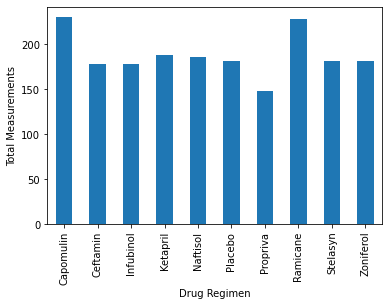

In [84]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_meas_group = clean_data.groupby(['Drug Regimen']).count()
num_meas = num_meas_group['Timepoint']
num_meas
num_meas.plot.bar()
plt.ylabel("Total Measurements")

Text(0, 0.5, 'Total Measurements')

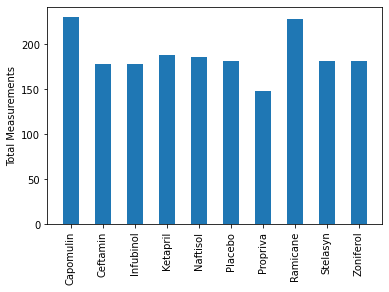

In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar = clean_data.groupby(['Drug Regimen']).count()
y_axis = bar['Timepoint']
x_axis = bar.index.tolist()
plt.bar(x_axis,y_axis, width=.5)
plt.xticks(rotation=90)
plt.ylabel("Total Measurements")

Number of male mice: 125
Number of female mice: 123


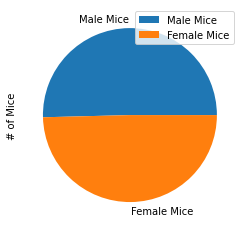

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_mice = clean_data.loc[clean_data['Sex']=='Male']
unique_male_mice = len(male_mice['Mouse ID'].unique())
print(f"Number of male mice: {unique_male_mice}")

female_mice = clean_data.loc[clean_data['Sex']=='Female']
unique_female_mice = len(female_mice['Mouse ID'].unique())
print(f"Number of female mice: {unique_female_mice}")

mice_df = pd.DataFrame({'# of Mice':[unique_male_mice,unique_female_mice ]}, index=['Male Mice', 'Female Mice'])
pie_plot = mice_df.plot.pie(y='# of Mice')


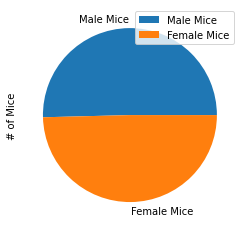

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution= [unique_male_mice,unique_female_mice ]
labels = ['Male Mice', 'Female Mice']
plt.pie(distribution, labels=labels)
plt.ylabel("# of Mice")
plt.legend(loc='upper right')
  

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
